In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns

vendor_payments = pd.read_csv('ct_VendorPayments.csv')

In [68]:
vendor_payments.head()

,PaymentDate,VendorName,PaymentAmount,Fund,FundDescription,Center,CenterName,Account,AccountName,FiscalYear,AccountingPeriod
0,8/14/2017 0:00,A TO Z EQUIPMENT RENTAL & SALES,1021.38,200,TRANSPORTATION,20860,TRAFFIC SIGNALS,53790,"MAT TO MAINT & REPAIR MACH, EQUIP",2018,2
1,8/14/2017 0:00,AIMS PVIC,380.00,100,GENERAL,25411,IRRIGATION REPAIR,52360,"MAINT - MACHINERY, EQUIP & AUTOS",2018,2
2,8/14/2017 0:00,AIMS PVIC,2125.00,200,TRANSPORTATION,20810,GRADING AND DRAINAGE,52390,MISC MAINTENANCE AND REPAIR,2018,2
3,8/14/2017 0:00,AIMS PVIC,15658.03,603,WATER RECLAMATION,29321,SEWER SYSTEM,52190,OTHER PROFESSIONAL SERVICES,2018,2
4,8/14/2017 0:00,ALL CITY TOWING,583.00,700,FLEET MANAGEMENT,20706,FLEET MANAGEMENT OPERATIONS,52360,"MAINT - MACHINERY, EQUIP & AUTOS",2018,2


In [5]:
vendor_payments.dtypes

PaymentDate          object
VendorName           object
PaymentAmount       float64
Fund                  int64
FundDescription      object
Center               object
CenterName           object
Account               int64
AccountName          object
FiscalYear            int64
AccountingPeriod      int64
dtype: object

## Fund Analysis

In [104]:
fund_payments = vendor_payments \
    .groupby(['FundDescription'])['PaymentAmount'] \
    .sum() \
    .sort_values(ascending=False).head(15) \
    .apply(lambda x: int(x)) \
    .head(15)

# I would like to be able to format with $ sign and commas, however this converts it to
# a data type that can't be aggregated in the bar chart below.
# is there a way to get around this?
#     .apply(lambda x: "${:,.0f}".format(x))

fund_payments

FundDescription
GENERAL                              44507852
WATER                                33524119
BENEFITS SELF INSURANCE              31977066
CIP AIRPORT                          18602434
CIP WATER                            15878392
TRANSPORTATION                       14885857
TOURISM DEVELOPMENT                  14175547
CIP WATER RECLAMATION                13231773
CIP TRANSPORTATION PRIVILEGE TAX     12622688
CIP GENERAL                          11481031
WATER RECLAMATION                    10422529
FLEET MANAGEMENT                      9112504
CIP FEDERAL GRANTS                    8931516
2017A MPC BONDS-WATER                 7339598
SOLID WASTE MANAGEMENT                4509578
Name: PaymentAmount, dtype: int64

In [96]:
# type(fund_payments)
fund_payments.dtypes

dtype('float64')

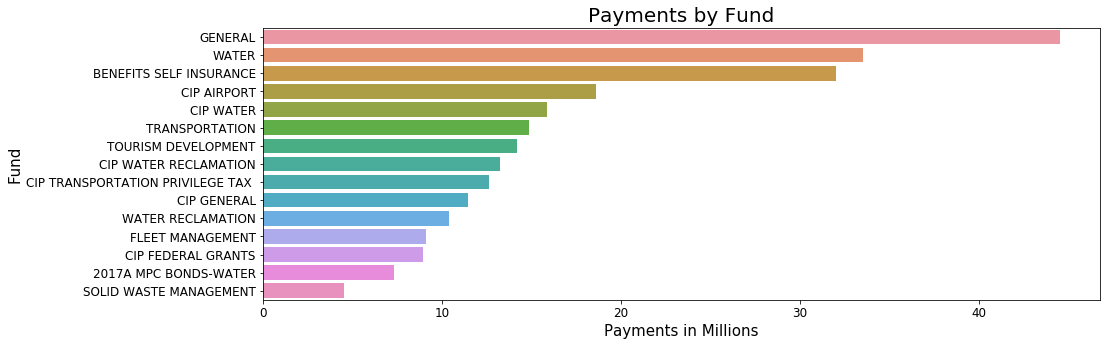

In [92]:
plt.rcParams["figure.figsize"] = [15, 5]

ax = sns.barplot(fund_payments.values, fund_payments.index)
plt.title('Payments by Fund',fontsize=20)
plt.tick_params(labelsize=12)

plt.ylabel('Fund',fontsize=15)
plt.xlabel('Payments in Millions',fontsize=15)

ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))

In [100]:
fund_payments_mean = vendor_payments \
    .groupby(['FundDescription'])['PaymentAmount'] \
    .mean() \
    .sort_values(ascending=False) \
    .apply(lambda x: int(x)) \
    .head(15)


fund_payments_mean

FundDescription
CIP AIRPORT                            229659
HOME                                   184819
2017A MPC BONDS-WATER                  156161
2017B MPC BONDS AVIATION               152690
2017A MPC BONDS-WATER DF               135006
CIP FEDERAL GRANTS                     129442
WATER DEVELOPMENT                      128109
BENEFITS SELF INSURANCE                125893
2015 GO BOND Q4-STREET PAVEMT REHAB    111624
CIP RWDS                                99474
CIP FLOOD CNTRL DISTRCT CONTRIB/IGA     93698
CIP STADIUM IMPROVEMENT IGA             68916
2015 GO BONDS Q5-PUBLIC SAFETY-FIRE     60332
CIP SRP MARICOPA INDIAN COM CONTRIB     58453
TOURISM DEVELOPMENT                     56476
Name: PaymentAmount, dtype: int64

In [101]:
fund_payments_mean.dtypes

dtype('int64')

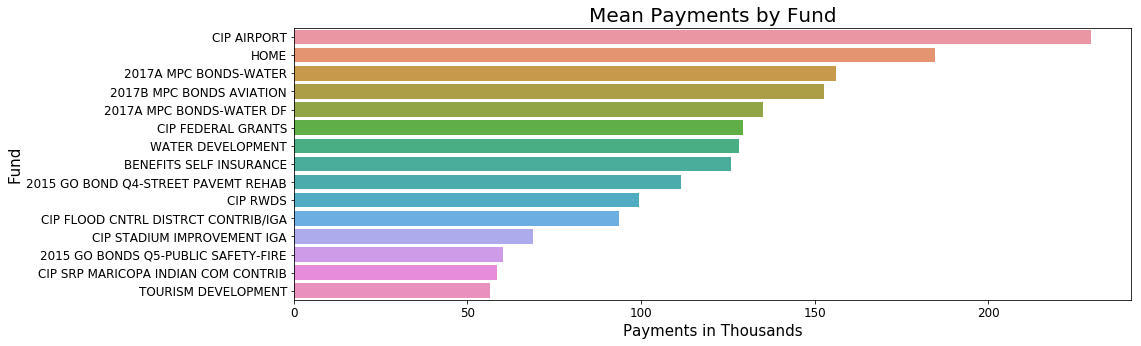

In [110]:
plt.rcParams["figure.figsize"] = [15, 5]

ax = sns.barplot(fund_payments_mean.values, fund_payments_mean.index)
plt.title('Mean Payments by Fund',fontsize=20)
plt.tick_params(labelsize=12)

plt.ylabel('Fund',fontsize=15)
plt.xlabel('Payments in Thousands',fontsize=15)

ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))

## Cost Center Analysis

In [105]:
center_payments = vendor_payments \
    .groupby(['CenterName'])['PaymentAmount'] \
    .sum() \
    .sort_values(ascending=False) \
    .apply(lambda x: int(x)) \
    .head(15)

center_payments

CenterName
CIGNA OAP IN-NETWORK                   23013387
CAP TREATMENT PLANT                    18780287
AIRPORT TERMINAL AREA RDVLOPMENT PR    18515382
DESTINATION MARKETING CONTRACT          9879556
VEHICLE ACQUISITIONS                    7181229
BOOSTER STATIONS                        5855296
FLW 24 TRANS MAIN & BOOSTER MOD         4743386
CIGNA OAP                               4690873
PAVEMENT OVERLAY PROGRAM                4608992
CULTURAL COUNCIL CONTRACT               4576580
ASPHALT & MAINTENANCE                   4560945
WASTEWATER COLLECTION SYSTEM IMPROV     4464733
WATER TREATMENT FACILITY IMPR           4321891
DATA CENTER RESILIENCY PLAN             4052343
UTILITIES                               3909870
Name: PaymentAmount, dtype: int64

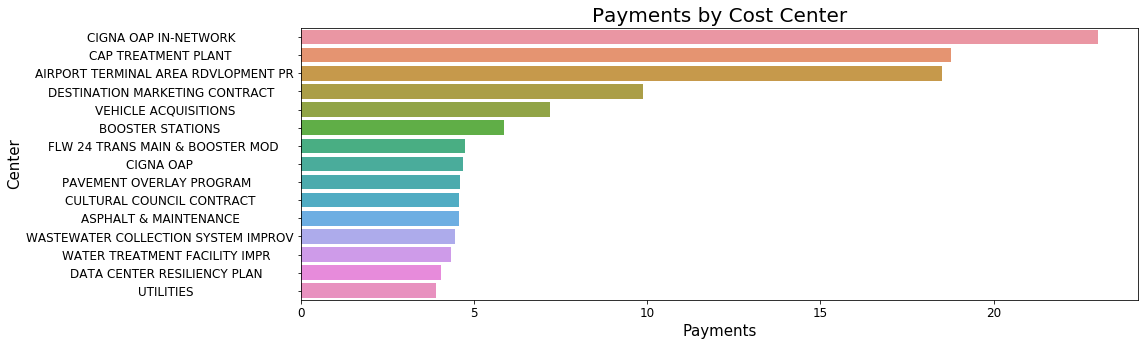

In [47]:
plt.rcParams["figure.figsize"] = [15, 5]

ax = sns.barplot(center_payments.values, center_payments.index)
plt.title('Payments by Cost Center',fontsize=20)
plt.tick_params(labelsize=12)

plt.ylabel('Center',fontsize=15)
plt.xlabel('Payments',fontsize=15)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))

plt.tick_params(labelsize=12)

In [107]:
center_payments_mean = vendor_payments \
    .groupby(['CenterName'])['PaymentAmount'] \
    .mean() \
    .sort_values(ascending=False) \
    .apply(lambda x: int(x)) \
    .head(15)
    
center_payments_mean

CenterName
APS RAINTREE ID I-6002                 1021050
POLICE PORT & VHCL RADIO REP            991027
TRANSIT BUS PURCHASES-X109              847146
DESTINATION MARKETING CONTRACT          759965
CULTURAL COUNCIL CONTRACT               508508
CIGNA OAP IN-NETWORK                    479445
TRANSIT BUS PURCHASES                   321205
SROG WW TREATMENT PLANT IMP             305398
AIRPORT TERMINAL AREA RDVLOPMENT PR     280536
WATER TREATMENT PLANT MEMBRANES         258517
SWG FRNCHSE CAPTL RECOVERY FEE          250740
FLW 24 TRANS MAIN & BOOSTER MOD         215608
SROG TRANSMISSION LINE                  198718
DOWNTOWN MARSHALL WAY L & EO *10/17     190502
RECONSTRUCT TAXIWAY A AND EXITS         189640
Name: PaymentAmount, dtype: int64

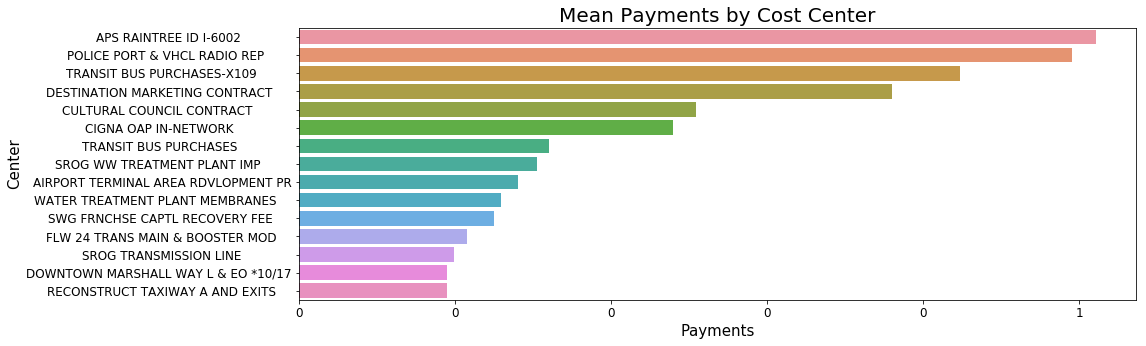

In [109]:
plt.rcParams["figure.figsize"] = [15, 5]

ax = sns.barplot(center_payments_mean.values, center_payments_mean.index)
plt.title('Mean Payments by Cost Center',fontsize=20)
plt.tick_params(labelsize=12)

plt.ylabel('Center',fontsize=15)
plt.xlabel('Payments',fontsize=15)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))

plt.tick_params(labelsize=12)

## Account Analysis

In [108]:
account_payments = vendor_payments \
    .groupby(['AccountName'])['PaymentAmount'] \
    .sum() \
    .sort_values(ascending=False) \
    .apply(lambda x: int(x)) \
    .head(15)

account_payments

AccountName
MEDICAL CLAIMS                         29812330
ELECTRIC                               19573764
CONT - BUILDINGS                       19287362
PURCHASED WATER                        14856617
CONT - STREETS                         13525350
CONT - WATER - DISTRIBUTION SYSTEM     11474641
CONT - OTHER                           10400798
DESTINATION MARKETING CONTRACT          9879556
MOTOR VEHICLES                          7085677
OTHER PROFESSIONAL SERVICES             6237781
CONT - WATER - BOOSTER STATION          6016847
CULTURAL COUNCIL CONTRACT               4576580
EQUP - MOTOR VEHICLES                   4575432
SOFTWARE MAINT & LICENSING              4475041
MAINT - MACHINERY, EQUIP & AUTOS        4288191
Name: PaymentAmount, dtype: int64

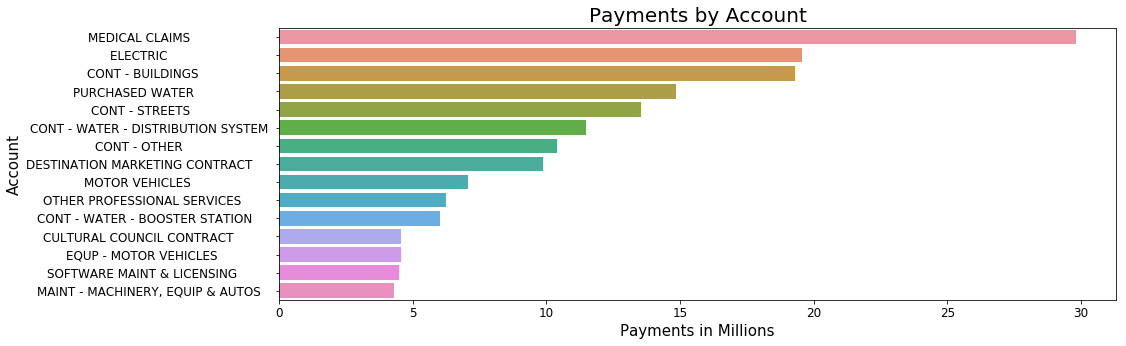

In [52]:
plt.rcParams["figure.figsize"] = [15, 5]

ax = sns.barplot(account_payments.values, account_payments.index)
plt.title('Payments by Account',fontsize=20)
plt.tick_params(labelsize=12)

plt.ylabel('Account',fontsize=15)
plt.xlabel('Payments in Millions',fontsize=15)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000000), ',')))

In [112]:
account_payments_mean = vendor_payments \
    .groupby(['AccountName'])['PaymentAmount'] \
    .mean() \
    .sort_values(ascending=False) \
    .apply(lambda x: int(x)) \
    .head(15)

account_payments_mean

AccountName
EQUP - RADIOS                          991027
BLDG - BLDG/PURCH BGT USE ONLY         971355
DESTINATION MARKETING CONTRACT         759965
CULTURAL COUNCIL CONTRACT              508508
EQUP - MOTOR VEHICLES                  508381
MEDICAL CLAIMS                         350733
PURCHASED WATER                        316098
PURCHASING CARD EXPENSE                291392
FIRE SERVICE CONTRACTS                 249768
TREATMENT FILTER MEDIA                 215948
STREET OVERLAY                         191373
CONT - BUILDINGS                       175339
PHOENIX TRANSIT CONTRACTS              172550
CONT - WATER - DISTRIBUTION SYSTEM     136602
IT - LICENSES & OTHER FEES             135999
Name: PaymentAmount, dtype: int64

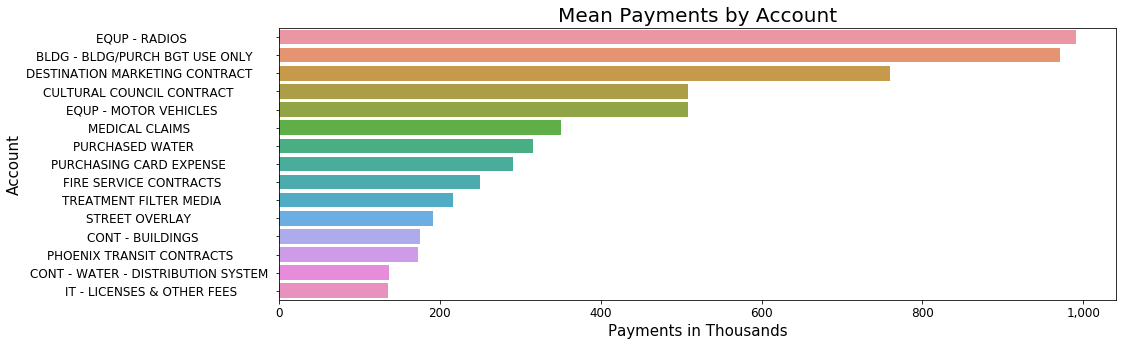

In [117]:
plt.rcParams["figure.figsize"] = [15, 5]

ax = sns.barplot(account_payments_mean.values, account_payments_mean.index)
plt.title('Mean Payments by Account',fontsize=20)
plt.tick_params(labelsize=12)

plt.ylabel('Account',fontsize=15)
plt.xlabel('Payments in Thousands',fontsize=15)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))